In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt


sys.path.append('../')

from BGS import BGS
from FileEmcee import FileEmcee
from EmceeRun import EmceeRun
from Plotter import Plotter
from VMaxDensity import VmaxDensity
from ZSchechterModel import ZSchechterModel

In [2]:
bgs = BGS('BGS_ANY_full.provabgs.lite.hdf5', is_bgs_bright=True)
emcee_file = FileEmcee(z_dependence=True, bin_test=True, info_file='0.01_0.4')
emcee_run = EmceeRun(emcee_file)

In [3]:
emcee_run.set_best_params(discard=150)
best_params = emcee_run.get_best_params()

In [4]:
plotter = Plotter(bgs, emcee_run)
vmax_hist = VmaxDensity(bgs.file, is_bgs_bright=True)       

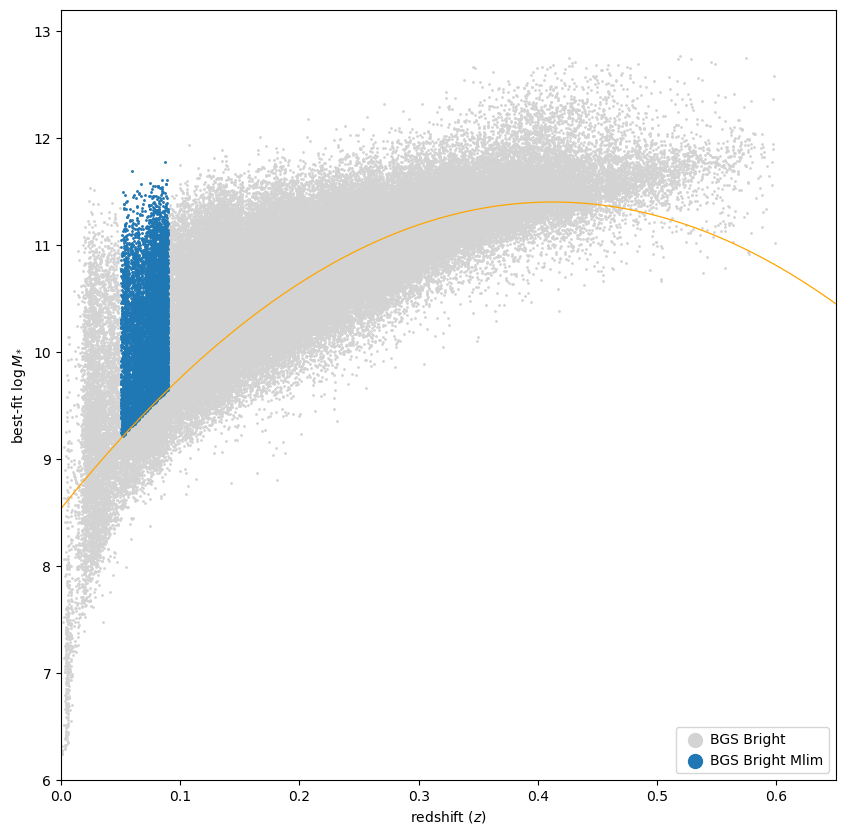

In [5]:
plt.figure(figsize=(10,10))
plotter.plot_selected_data(0.05, 0.09)

In [6]:
z, x, x_median, w_spec, vmax = bgs.select_galaxies(0.05, 0.09)

(0.04902184870217866, 0.09099955015970745)

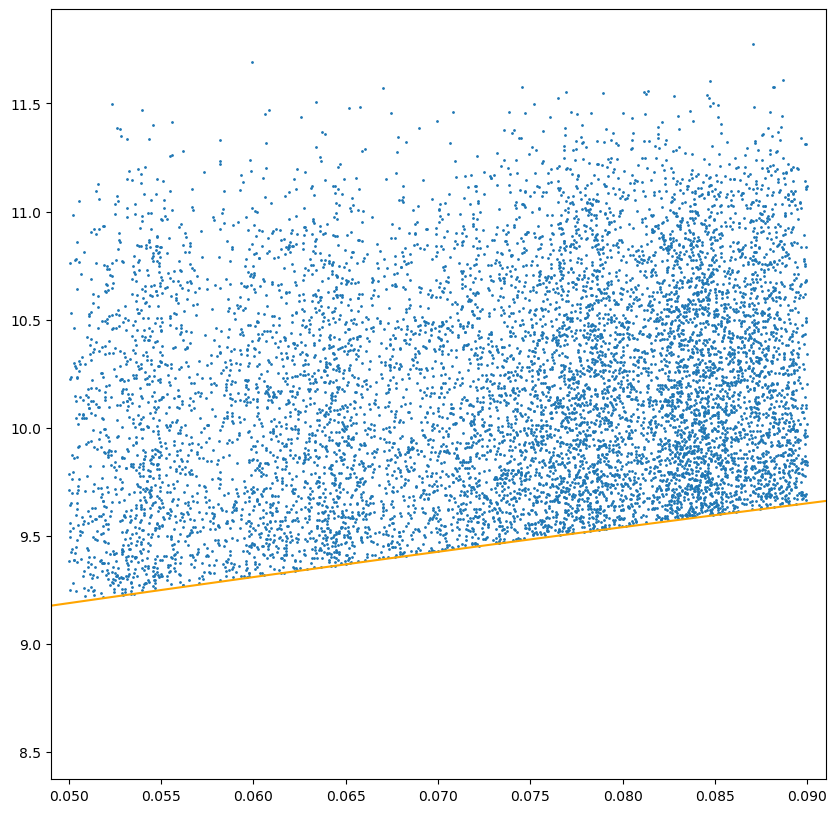

In [7]:
z_lin = np.linspace(0.,0.6, 100)
plt.figure(figsize=(10,10))
plt.scatter(z,x_median, s=1)
plt.plot(z_lin, bgs.mass_completeness_limit(z_lin), c='orange')
plt.xlim(z.min()-0.001, z.max()+0.001)

In [8]:
h, b = np.histogram(x_median, range=(6.,13.), weights=(w_spec/vmax), bins=40)

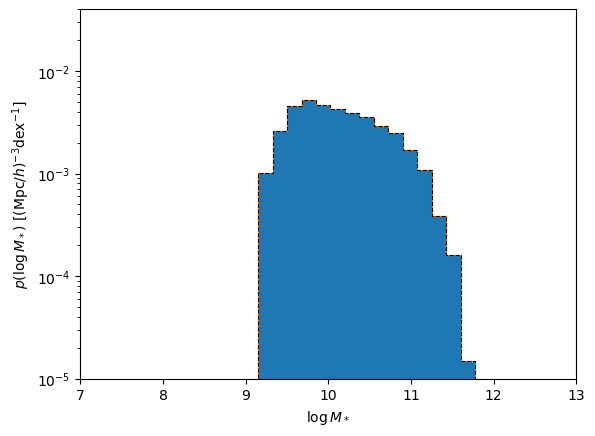

In [9]:
plt.hist(x_median, range=(6., 13.), weights=(w_spec/vmax), bins=40)
plotter.plot_vmax_hist(h, b, h, b)
plt.show()

In [10]:
h

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.01996834e-03, 2.60021797e-03,
       4.51646028e-03, 5.21199440e-03, 4.63119576e-03, 4.24242508e-03,
       3.85487425e-03, 3.53750561e-03, 2.93519230e-03, 2.48634766e-03,
       1.68476562e-03, 1.09054578e-03, 3.86353683e-04, 1.59469586e-04,
       1.49555416e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [11]:
b

array([ 6.   ,  6.175,  6.35 ,  6.525,  6.7  ,  6.875,  7.05 ,  7.225,
        7.4  ,  7.575,  7.75 ,  7.925,  8.1  ,  8.275,  8.45 ,  8.625,
        8.8  ,  8.975,  9.15 ,  9.325,  9.5  ,  9.675,  9.85 , 10.025,
       10.2  , 10.375, 10.55 , 10.725, 10.9  , 11.075, 11.25 , 11.425,
       11.6  , 11.775, 11.95 , 12.125, 12.3  , 12.475, 12.65 , 12.825,
       13.   ])

## Comparison $1/V_{max}$ - $\Phi(M_{*}, z)$ at different redshift bins

In [ ]:
zmins = np.array([0.01 + 0.04 * i for i in range(4)])
zmaxs = np.array([0.05 + 0.04 * i for i in range(4)])

x_lin_ext = np.linspace(7, 14, 100)

fig = plt.figure(figsize=(15,15))

plot_params_ext = {'color': 'orange', 'linestyle':'--'}
plot_params = {'color':'orange', 'linestyle':'-'}

for i, zmin, zmax, z0 in zip(range(4), zmins, zmaxs, zmins + (zmaxs - zmins)/2.):
    plt.subplot(2,2,i+1)
    h, b, _h, _b = vmax_hist.histogram_norm(zmin, zmax)
    z_smf = ZSchechterModel(bgs, zmin, zmax, z0)
    
    n = z_smf.normalisation(best_params)

    x_lin = np.linspace(z_smf.mlim.min(), 14, 100)
    # print(z_smf.mlim.min())
    plotter.plot_vmax_hist(h, b, _h, _b, **{'label':f'${zmin}< z <{zmax:.2f}$'})
    Plotter.plot_zschechter(x_lin, z0, n, best_params, **plot_params)
    Plotter.plot_zschechter(x_lin_ext, z0, n, best_params, **plot_params_ext)
    plt.legend(loc='best')
plt.show()

    

    
    
    